# PCA on IRIS

# Road map
objective is to find if the decision tree model is better with PCA or not
1. Apply Decision Tree and capture the accuracy score + kappa score
2. scale the dataset
3. Appply pca and find the number of components 
4. tune the data with pca
5. split the data into x and y and take test samples as 0.30  and random_state=0
5. re-apply the decision tree and compare the result


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from scipy.stats import zscore
from sklearn import metrics

In [2]:
from sklearn.datasets import load_iris

In [3]:
i=load_iris()

In [4]:
i.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
iris=pd.DataFrame(i.data,columns=i.feature_names)

In [6]:
iris['Target']=i.target

In [7]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
iris.shape

(150, 5)

In [9]:
iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Target               0
dtype: int64

#  modelling the data

In [10]:

from sklearn.model_selection import train_test_split

In [11]:
x=iris.drop('Target',axis=1)
y=iris.Target

In [12]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.30,random_state=0)

In [13]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()

In [14]:
dtree.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [15]:
model_tree=dtree.predict(xtest)

In [16]:
from sklearn.metrics import accuracy_score,cohen_kappa_score

In [17]:
accuracy_score(ytest,model_tree)

0.9777777777777777

In [18]:
cohen_kappa_score(ytest,model_tree)

0.966190833959429

# PCA

In [19]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [20]:
newiris=sc.fit_transform(iris.drop("Target",axis=1))

In [21]:
newiris

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [22]:
newiris=pd.DataFrame(newiris, columns=iris.columns[:4])

In [23]:
newiris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [24]:
#import pca library
from sklearn.decomposition import PCA
pc=PCA()

In [25]:
pca_val=pc.fit_transform(newiris)

In [26]:
pc.explained_variance_ #for 4 columns 4 values #these are acutal values

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [27]:
pc.explained_variance_ratio_#variance in %

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

In [28]:
np.cumsum(pc.explained_variance_ratio_) #cumulative value of variance %
#95% variance is explained by 2 components

array([0.72962445, 0.95813207, 0.99482129, 1.        ])

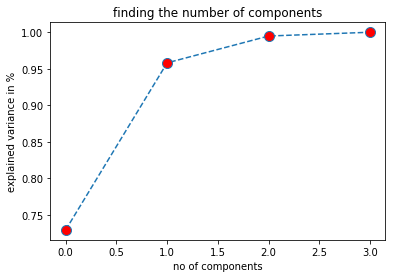

In [53]:
plt.plot(np.cumsum(pc.explained_variance_ratio_),"-o",linestyle="dashed",markerfacecolor="red",markersize=10) 
plt.xlabel("no of components")
plt.ylabel("explained variance in %")
plt.title("finding the number of components")
plt.show()

In [30]:
#therefore 2 components explians the max varince in the data

In [31]:
pc1=PCA(n_components=2)
pca_val1=pc1.fit_transform(newiris)

In [32]:
pca_iris=pd.DataFrame(pca_val1) #new data frame with 2 components

In [33]:
pca_iris.shape

(150, 2)

In [34]:
x_train,x_test,y_train,y_test = train_test_split(pca_iris,y,test_size=0.30,random_state=0)

# Decision tree with PCA

In [35]:
dtree1=DecisionTreeClassifier()

In [36]:
dtree1.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [37]:
model_tree1=dtree1.predict(x_test)

In [38]:
accuracy_score(y_test,model_tree1)

0.8666666666666667

In [39]:
cohen_kappa_score(y_test,model_tree1)

0.7960725075528701

In [40]:
# DT with PCA has reduced the accuracy and kappa score

In [41]:
# hence we can infer that PCA in low dimension can be a disaster

# Random forest

In [42]:
from sklearn.ensemble import RandomForestClassifier
rc=RandomForestClassifier()

In [43]:
rc.fit(xtrain,ytrain)

C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [44]:
rc_predict=rc.predict(xtest)

In [45]:
accuracy_score(ytest,rc_predict)

0.9777777777777777

In [46]:
cohen_kappa_score(ytest,rc_predict)

0.966190833959429

# Random forest with PCA

In [47]:
rf1=RandomForestClassifier()

In [48]:
rf1.fit(x_train,y_train)

C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [49]:
model_forest=rf1.predict(x_test)

In [50]:
accuracy_score(y_test,model_forest)

0.8888888888888888

In [51]:
cohen_kappa_score(y_test,model_forest)

0.8291571753986333

In [56]:
iris.Target.unique()

array([0, 1, 2], dtype=int64)

In [57]:
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

x_train,x_test,y_train,y_test = train_test_split(pca_iris,y,test_size=0.30,random_state=0)

In [58]:
lr=LogisticRegression()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
nb=GaussianNB()
models = [lr, nb, knn, dt, rf]
for mod in models : 
    print(mod)
    print("\n")
    mod.fit(x_train,y_train)
    ypred = mod.predict(x_test)
    print("Accuracy",metrics.accuracy_score(y_test,ypred))
    conf_matrix = metrics.confusion_matrix(y_test, ypred)
    print(conf_matrix)
    print(metrics.classification_report(y_test, ypred))
    print("\n \n")

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)




C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy 0.8666666666666667
[[16  0  0]
 [ 0 12  6]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.67      0.80        18
           2       0.65      1.00      0.79        11

   micro avg       0.87      0.87      0.87        45
   macro avg       0.88      0.89      0.86        45
weighted avg       0.91      0.87      0.87        45


 

GaussianNB(priors=None, var_smoothing=1e-09)


Accuracy 0.9111111111111111
[[16  0  0]
 [ 0 16  2]
 [ 0  2  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.89      0.89      0.89        18
           2       0.82      0.82      0.82        11

   micro avg       0.91      0.91      0.91        45
   macro avg       0.90      0.90      0.90        45
weighted avg       0.91      0.91      0.91        45


 

KNeighborsClassifier(algorithm='auto', leaf_size=30, 

C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [78]:
from sklearn.ensemble import AdaBoostClassifier

classifiers =[]
model1 = LogisticRegression()
classifiers.append(model1)
model2 = KNeighborsClassifier()
classifiers.append(model2)
model3 = DecisionTreeClassifier()
classifiers.append(model3)
model4 = RandomForestClassifier()
classifiers.append(model4)
model5 = AdaBoostClassifier()
classifiers.append(model5)


model_name = ['LogisticRegression','KNN','DecisionTreeClassifier','RandomForestClassifier','AdaBoostClassifier']
Training_score ,Testing_score,classifiers_list = [],[],[]


for i in range(0,len(classifiers)):
    clf = classifiers[i]
    clf.fit(x_train,y_train)
    ypred = clf.predict(x_test)
    cm = metrics.confusion_matrix(y_test, ypred)
    classifiers_list.append(model_name[i])
    Training_score.append(clf.score(x_train,y_train))
    Testing_score.append(clf.score(x_test,y_test))


C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
